# Assignment 9

This repository contains the same file `data_1.dat` from [Assignment 8](https://github.com/PGE383-HPC-Spring2018/assignment7) and Python classes named `StressStrainConverter` and `Toughness` that implement a solution to that assignment.

You should complete the derived class `Plotter` to create the following plot exactly as shown. 

![img](ss_plot_gold.png)

Specifically you will need to complete the `plot()` function.  Here are couple of hints to get things exactly right.

 * The gray fill color can be specified using the option `color='0.75'`.
 
 * The label in the center uses $\LaTeX$, specifically it uses the `\mathcal{T}` for the cursive T.
 
 * Don't hard code the value of toughness, but rather compute it, store it as a variable and use that to create the label.
 
After you have the tests passing on Travis, check back in on the repository to view the PDF that was automatically generated.


## Please Note

You may write your code directly in the Jupyter Notebook below or convert the notebook to a plain Python file with the command

```bash
jupyter nbconvert --to python assignment9.ipynb
```

which will create a file `assignment9.py`.  If you commit this file to the repository, only the Python file will be tested (not the Jupyter notebook).  However, if you do not commit this file into the repository, the Jupyter notebook will be converted automatically on Travis before testing.  

In [1]:
import numpy as np
import linecache
import scipy.integrate
import matplotlib.pyplot as plt

class StressStrainConverter():
    
    def __init__(self, filename):
        
        self.filename = filename
        

    def extract_dimensions(self):

        line = linecache.getline(self.filename, 3).split('=')

        self.width = float(line[1].split('"')[0])

        self.thickness = float(line[2].split('"')[0]) 

        return
    

    def convert_to_true_stress_and_strain(self):
        
        self.extract_dimensions()

        eng_strain, force = np.loadtxt(self.filename, skiprows=5, usecols=(2,3)).T 

        self.true_strain = np.log(1 + eng_strain)

        self.true_stress = force / self.width / self.thickness * (1 + eng_strain)

        return 
    
    
class Toughness(StressStrainConverter):
    
    def compute_toughness_simps(self):
        
        self.convert_to_true_stress_and_strain()
        
        return scipy.integrate.simps(self.true_stress, self.true_strain)
    
    def compute_toughness_trapz(self):
        
        self.convert_to_true_stress_and_strain()
        
        return scipy.integrate.trapz(self.true_stress, self.true_strain)
    
    
class Plotter(Toughness):
    
    def plot(self):
        
        font = {
        'color':  'b',
        'weight': 'normal',
        'size': 16,
        }
        
        toughness = self.compute_toughness_simps()
        
        plt.figure(figsize=(8, 6), dpi=80)
        plt.plot(self.true_strain, self.true_stress, 'k')
        plt.fill_between(self.true_strain, self.true_stress, color='0.75')
        plt.text(0.25, 60000, r'$\mathcal{T} =$' + str(int(np.around(toughness))) + ' psi', fontdict=font)
        plt.xlabel(r'$\varepsilon$ (in/in)')
        plt.ylabel(r'$\sigma$ (psi)')
    
    def plot_png(self, basename):
        
        self.plot()
        
        plt.savefig(basename + '.png', bbox_inches='tight')
        
    def plot_pgf(self, basename):
        
        self.plot()
        
        plt.savefig(basename + '.pgf', bbox_inches='tight')

In [2]:
import skimage
import skimage.measure
import skimage.transform
import cv2

def test_plot():
    
    p = Plotter('data_1.dat')
    p.plot_png('ss_plot')
    
    gold_image = cv2.imread('ss_plot_gold.png')
    test_image = cv2.imread('ss_plot.png')
    
    test_image_resized = skimage.transform.resize(test_image, 
                                                  (gold_image.shape[0], gold_image.shape[1]), 
                                                  mode='constant')
    
    ssim = skimage.measure.compare_ssim(skimage.img_as_float(gold_image), test_image_resized, multichannel=True)
    assert ssim >= 0.9

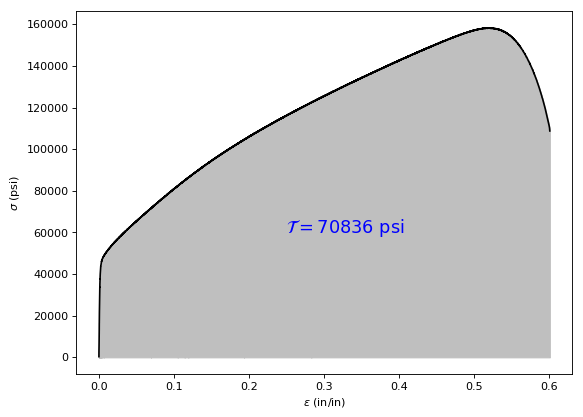

In [3]:
test_plot()